# Evolutionary algorithms for global optimization problems

In this notebook, we will explore options for integrating global optimization techniques into drug discovery problems.

## Preamble
Load packages and define figure plotting options.

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from matplotlib import cm

In [3]:
%matplotlib inline

In [4]:
plt.rcParams["figure.figsize"]=10,10
plt.rcParams['figure.dpi'] = 300

## Define example function

As an example of a multidimensional function with many local minima, but only one global minimum, we will define the Ackley function, given by the following equation in a 2D space:

$$
f(x,y) = -20 \cdot \exp( -0.2 \sqrt{0.5 \cdot (x^2 + y^2)} ) -\exp( 0.5 \cdot ( \cos(2 \pi x) + \cos(2 \pi y) ) ) + e + 20
$$

In [5]:
def ackley(var2D):
    '''
    Ackley function defined on a 2D space.
    '''

    sqrSum = var2D[0] ** 2 + var2D[1] ** 2
    cosSum = np.cos(2 * np.pi * var2D[0]) + np.cos(2 * np.pi * var2D[1])

    sqrExp = -20 * np.exp(-0.2 * np.sqrt( sqrSum/2 ) )
    cosExp = -np.exp( cosSum/2 )

    ackleyTotal = sqrExp + cosExp + 20 + np.e
    
    return ackleyTotal

In [6]:
# Test evaluation in random point
ackley([-3.5,4.1])

12.478119281787029

In [7]:
# Test evaluation at global minimum
ackley([0,0])

4.440892098500626e-16

To get a better intuition on the function's behavior, we can create a 3D plot by evaluating it on a grid, as follows:

In [8]:
# Set evaluation bounds
bounds = [(-5, 5), (-5, 5)]

# Set step size to create a fine grid
step = 0.10

# Create a mesh
x = np.arange(bounds[0][0], bounds[0][1], step)
y = np.arange(bounds[1][0], bounds[1][1], step)
x, y = np.meshgrid(x, y)

# Evaluate function on mesh
results = ackley([x,y])

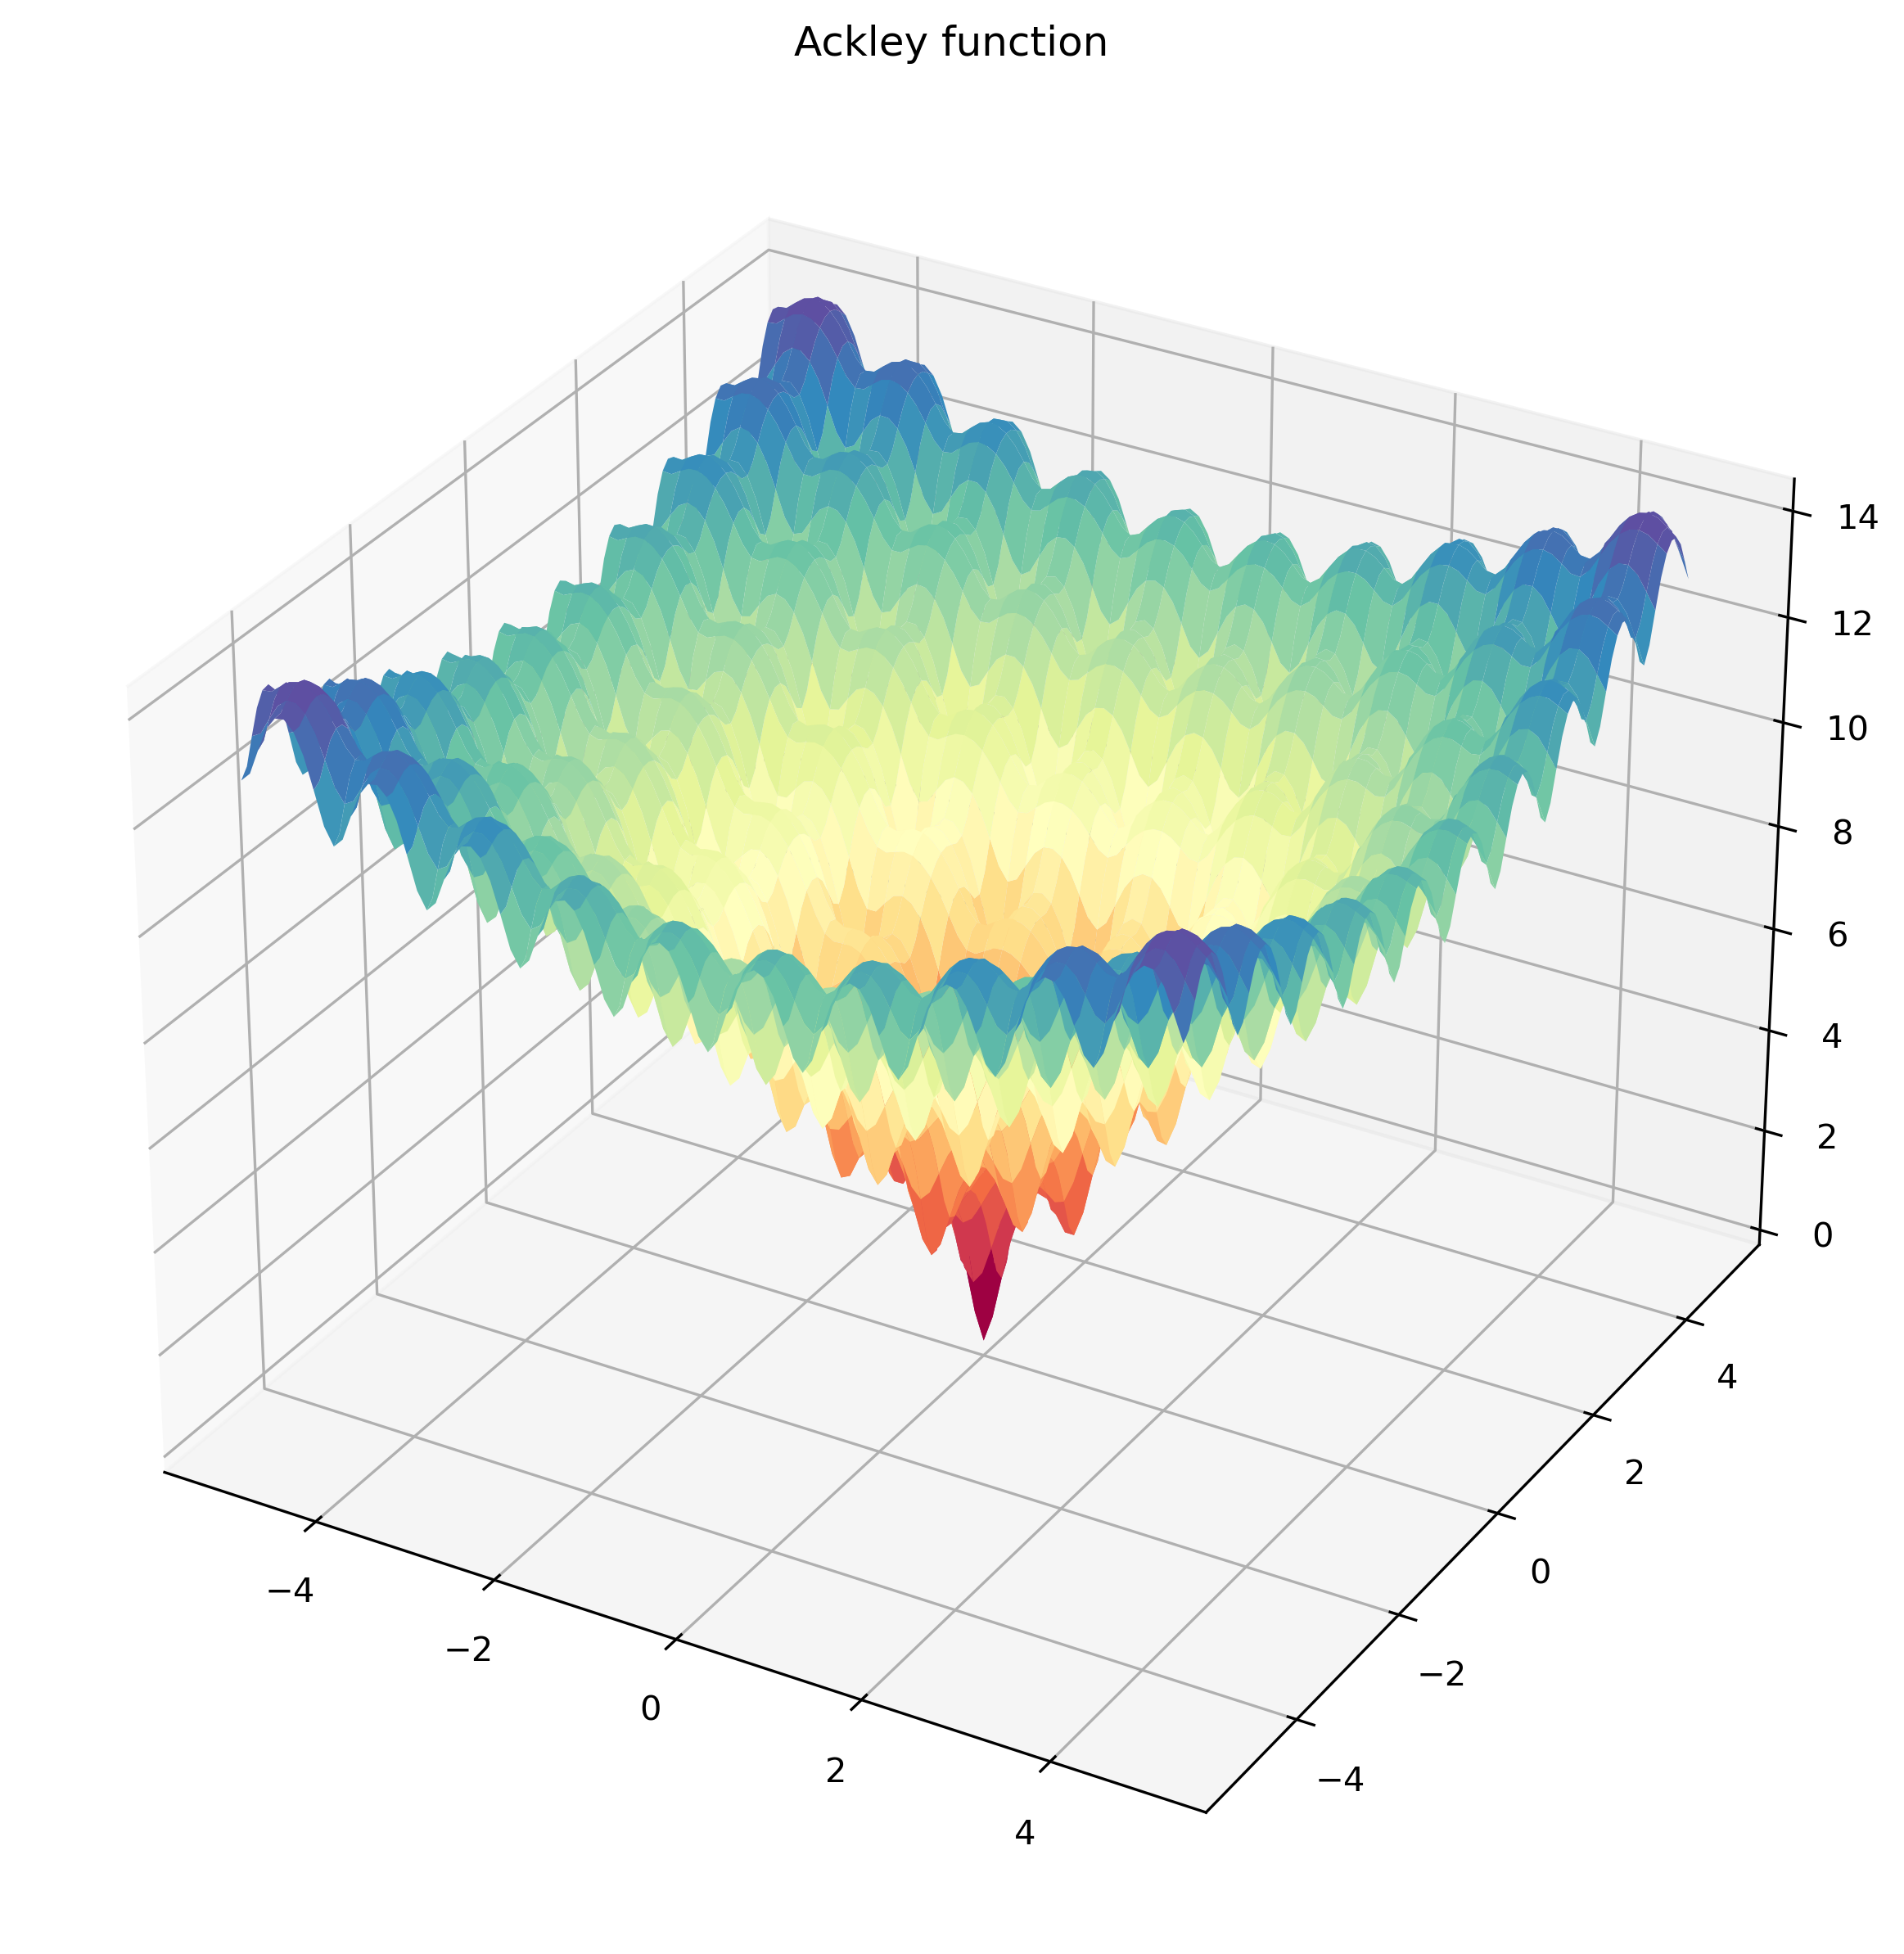

In [9]:
### Plot Ackley function in 3D

# Initialize figure
fig = plt.figure()

ax = plt.axes(projection ='3d')

# Add surface plot to figure
ax.plot_surface(x, y, results, cmap =cm.Spectral, linewidth=0)

# Set figure title
ax.set_title('Ackley function')

# Show plot in notebook
plt.show()

## Use Differential Evolution to find global minimum

In [10]:
from scipy.optimize import differential_evolution

In [11]:
result = differential_evolution(ackley, bounds)

In [12]:
result.x

array([0., 0.])

In [13]:
result.fun

4.440892098500626e-16

## Use Basin Hopping to find global minimum

In [14]:
from scipy.optimize import basinhopping

In [15]:
initGuess = (-1,1)
result = basinhopping(ackley, initGuess)

In [16]:
result.x

array([-8.45159080e-10,  5.35870605e-10])

In [17]:
result.fun

2.830479406412678e-09

## Use Gradient Descent to find minimum

As discussed, gradient descent methods are used to find the direction in which the function changes most rapidly. They are well suited for local minimization tasks, and as exemplified here, not well suited at all for global optimization challanges.

In [18]:
from scipy.optimize import minimize

In [19]:
initGuess = (-1,1)
result = minimize(ackley, initGuess, method='Nelder-Mead', tol=1e-6, options={"maxfev":10000, 'adaptive':True})

In [20]:
result.x

array([-0.96847762,  0.96847741])

In [21]:
result.fun

3.5744518772593072

## A cost function with multiple global minima

The following problem allows us to explore another feature of random search algorithms. When optimizing a cost function, it is possible that the problem may have multiple minima that are close or identical in cost. Utilizing a global optimization algorithm may mean having to deal with several different solutions that can have equivalent fitness values.

In [22]:
def himmelblau(var2D):
    '''
    Himmelblau's function defined on a 2D space.
    '''

    fac1 = (var2D[0]**2 + var2D[1] - 11)**2
    fac2 = (var2D[0] + var2D[1]**2 - 7)**2

    return fac1 + fac2

In [23]:
# Set evaluation bounds
boundsHimm = [(-6, 6), (-6, 6)]

# Set step size to create a fine grid
step = 0.10

# Create a mesh
x = np.arange(boundsHimm[0][0], boundsHimm[0][1], step)
y = np.arange(boundsHimm[1][0], boundsHimm[1][1], step)
x, y = np.meshgrid(x, y)

# Evaluate function on mesh
resultsHimm = himmelblau([x,y])

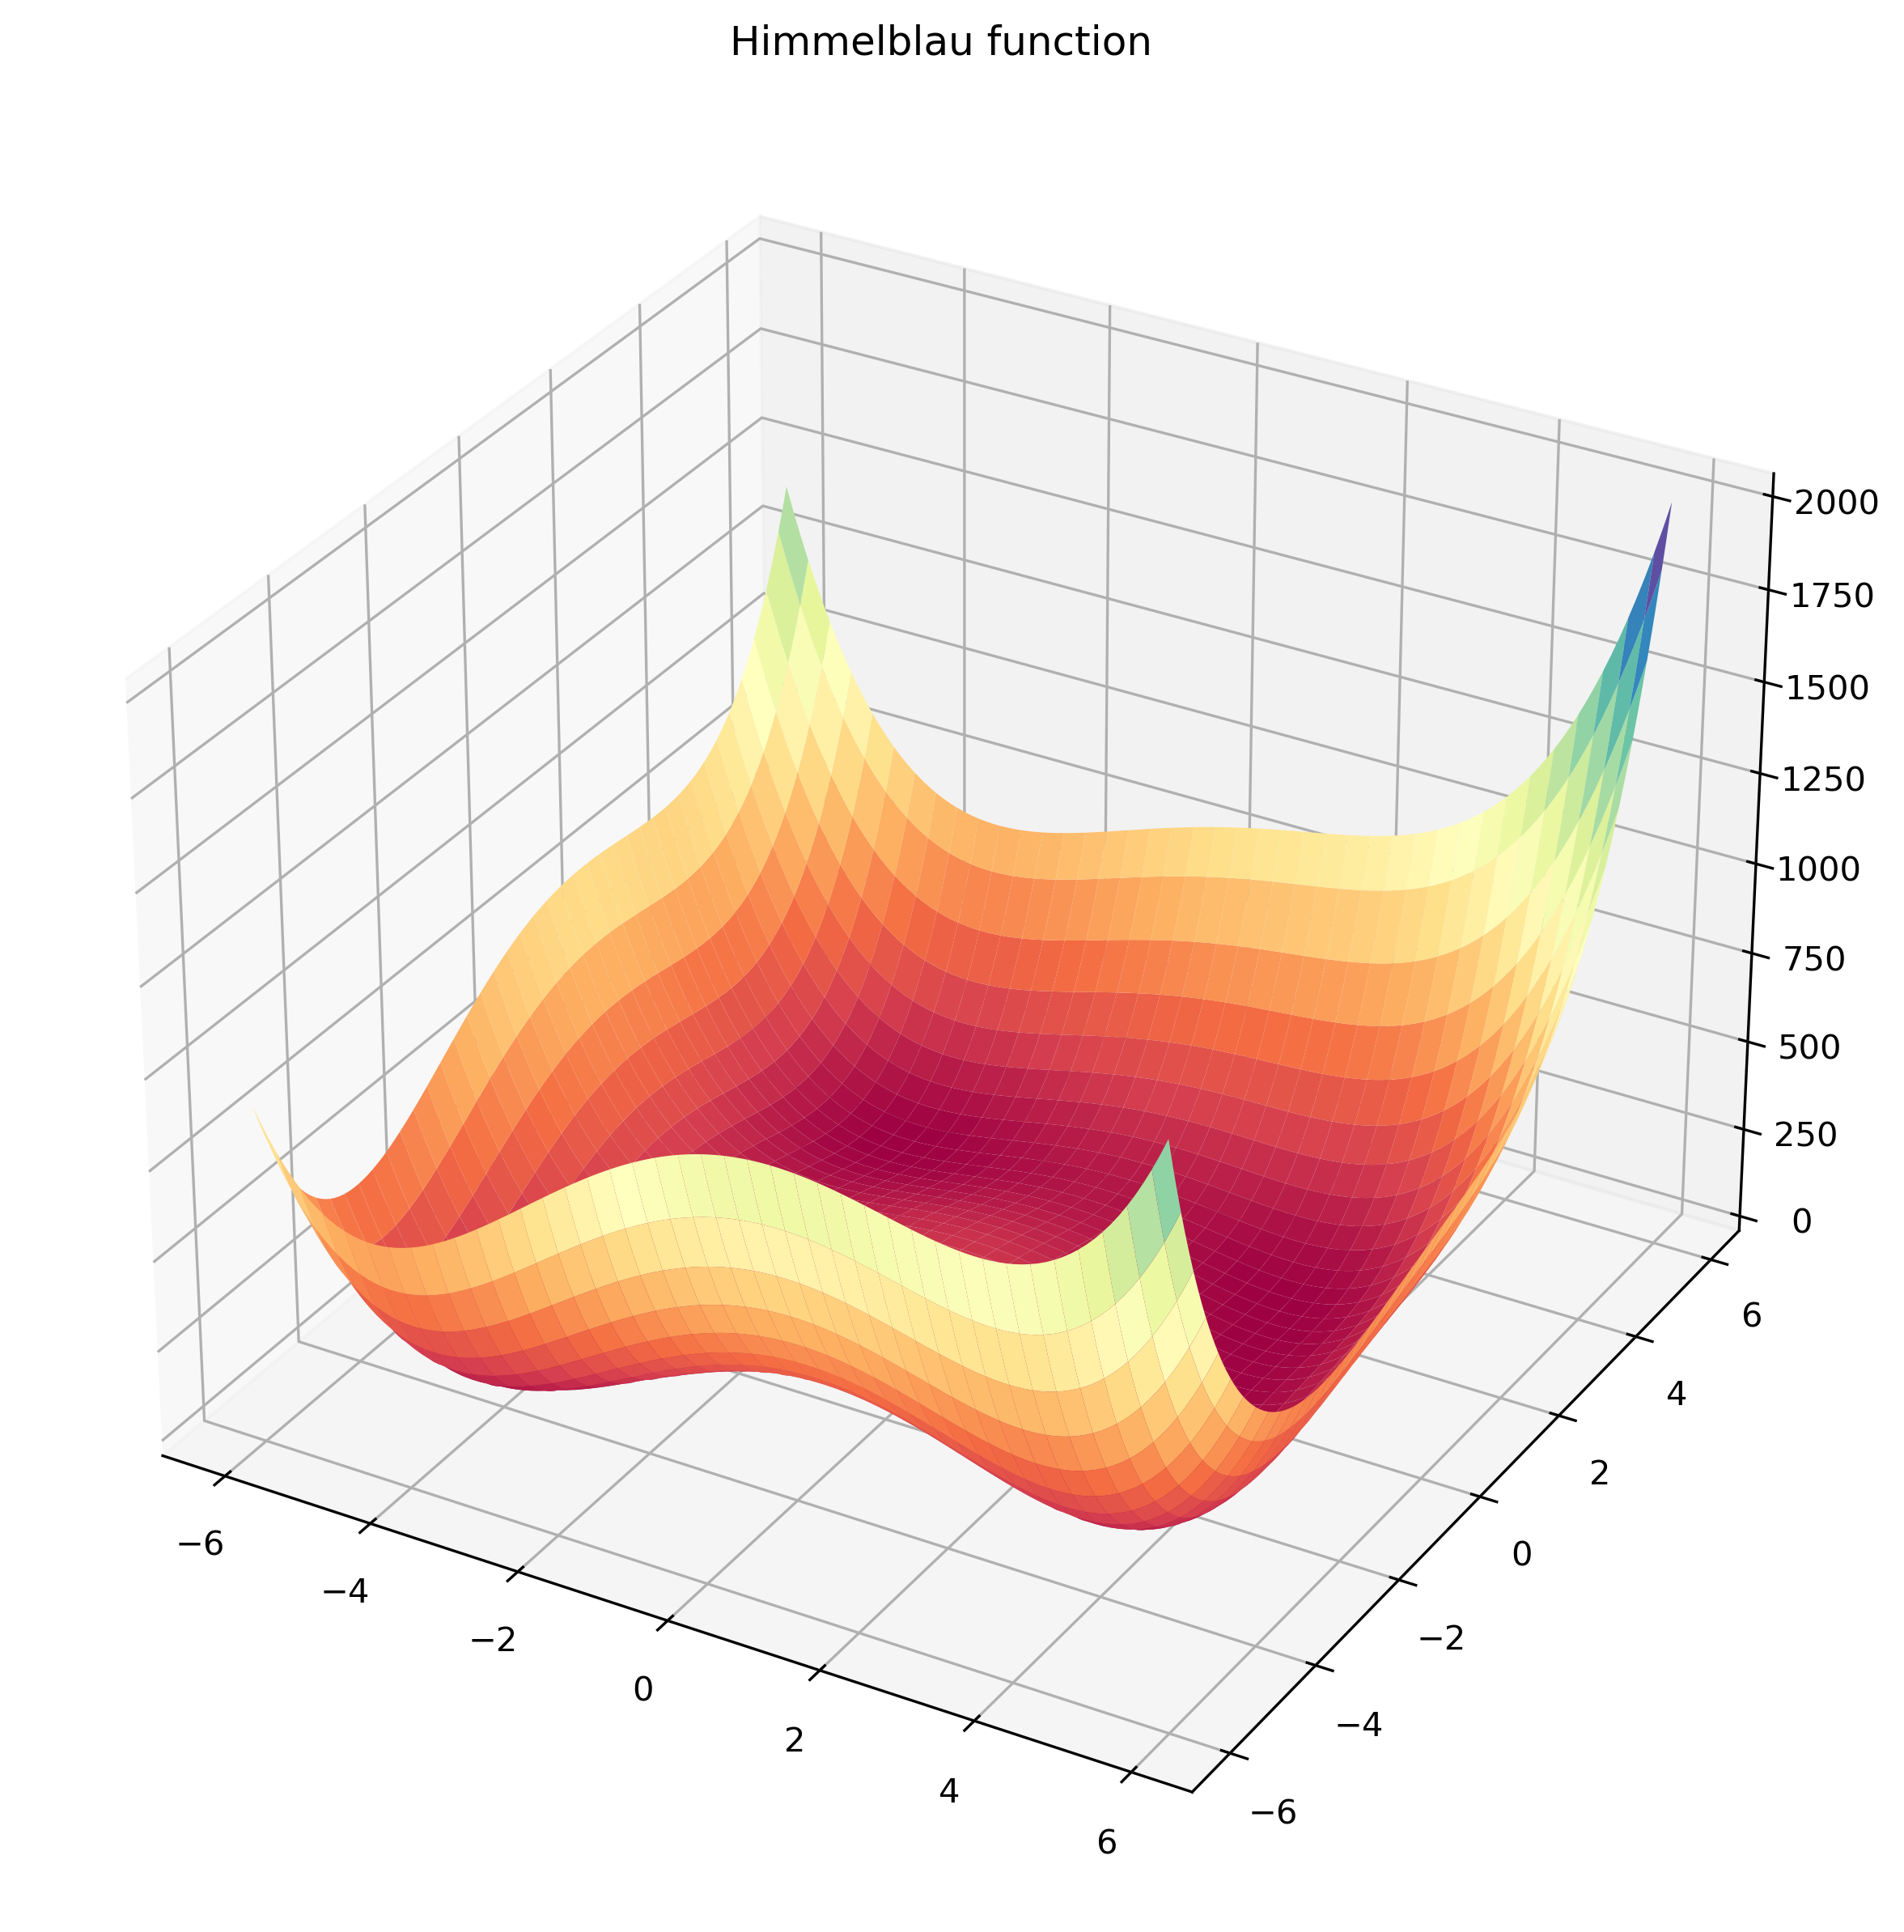

In [24]:
### Plot Himmelblau function in 3D

# Initialize figure
fig = plt.figure()

ax = plt.axes(projection ='3d')

# Add surface plot to figure
ax.plot_surface(x, y, resultsHimm, cmap =cm.Spectral, linewidth=0)

# Set figure title
ax.set_title('Himmelblau function')

# Show plot in notebook
plt.show()

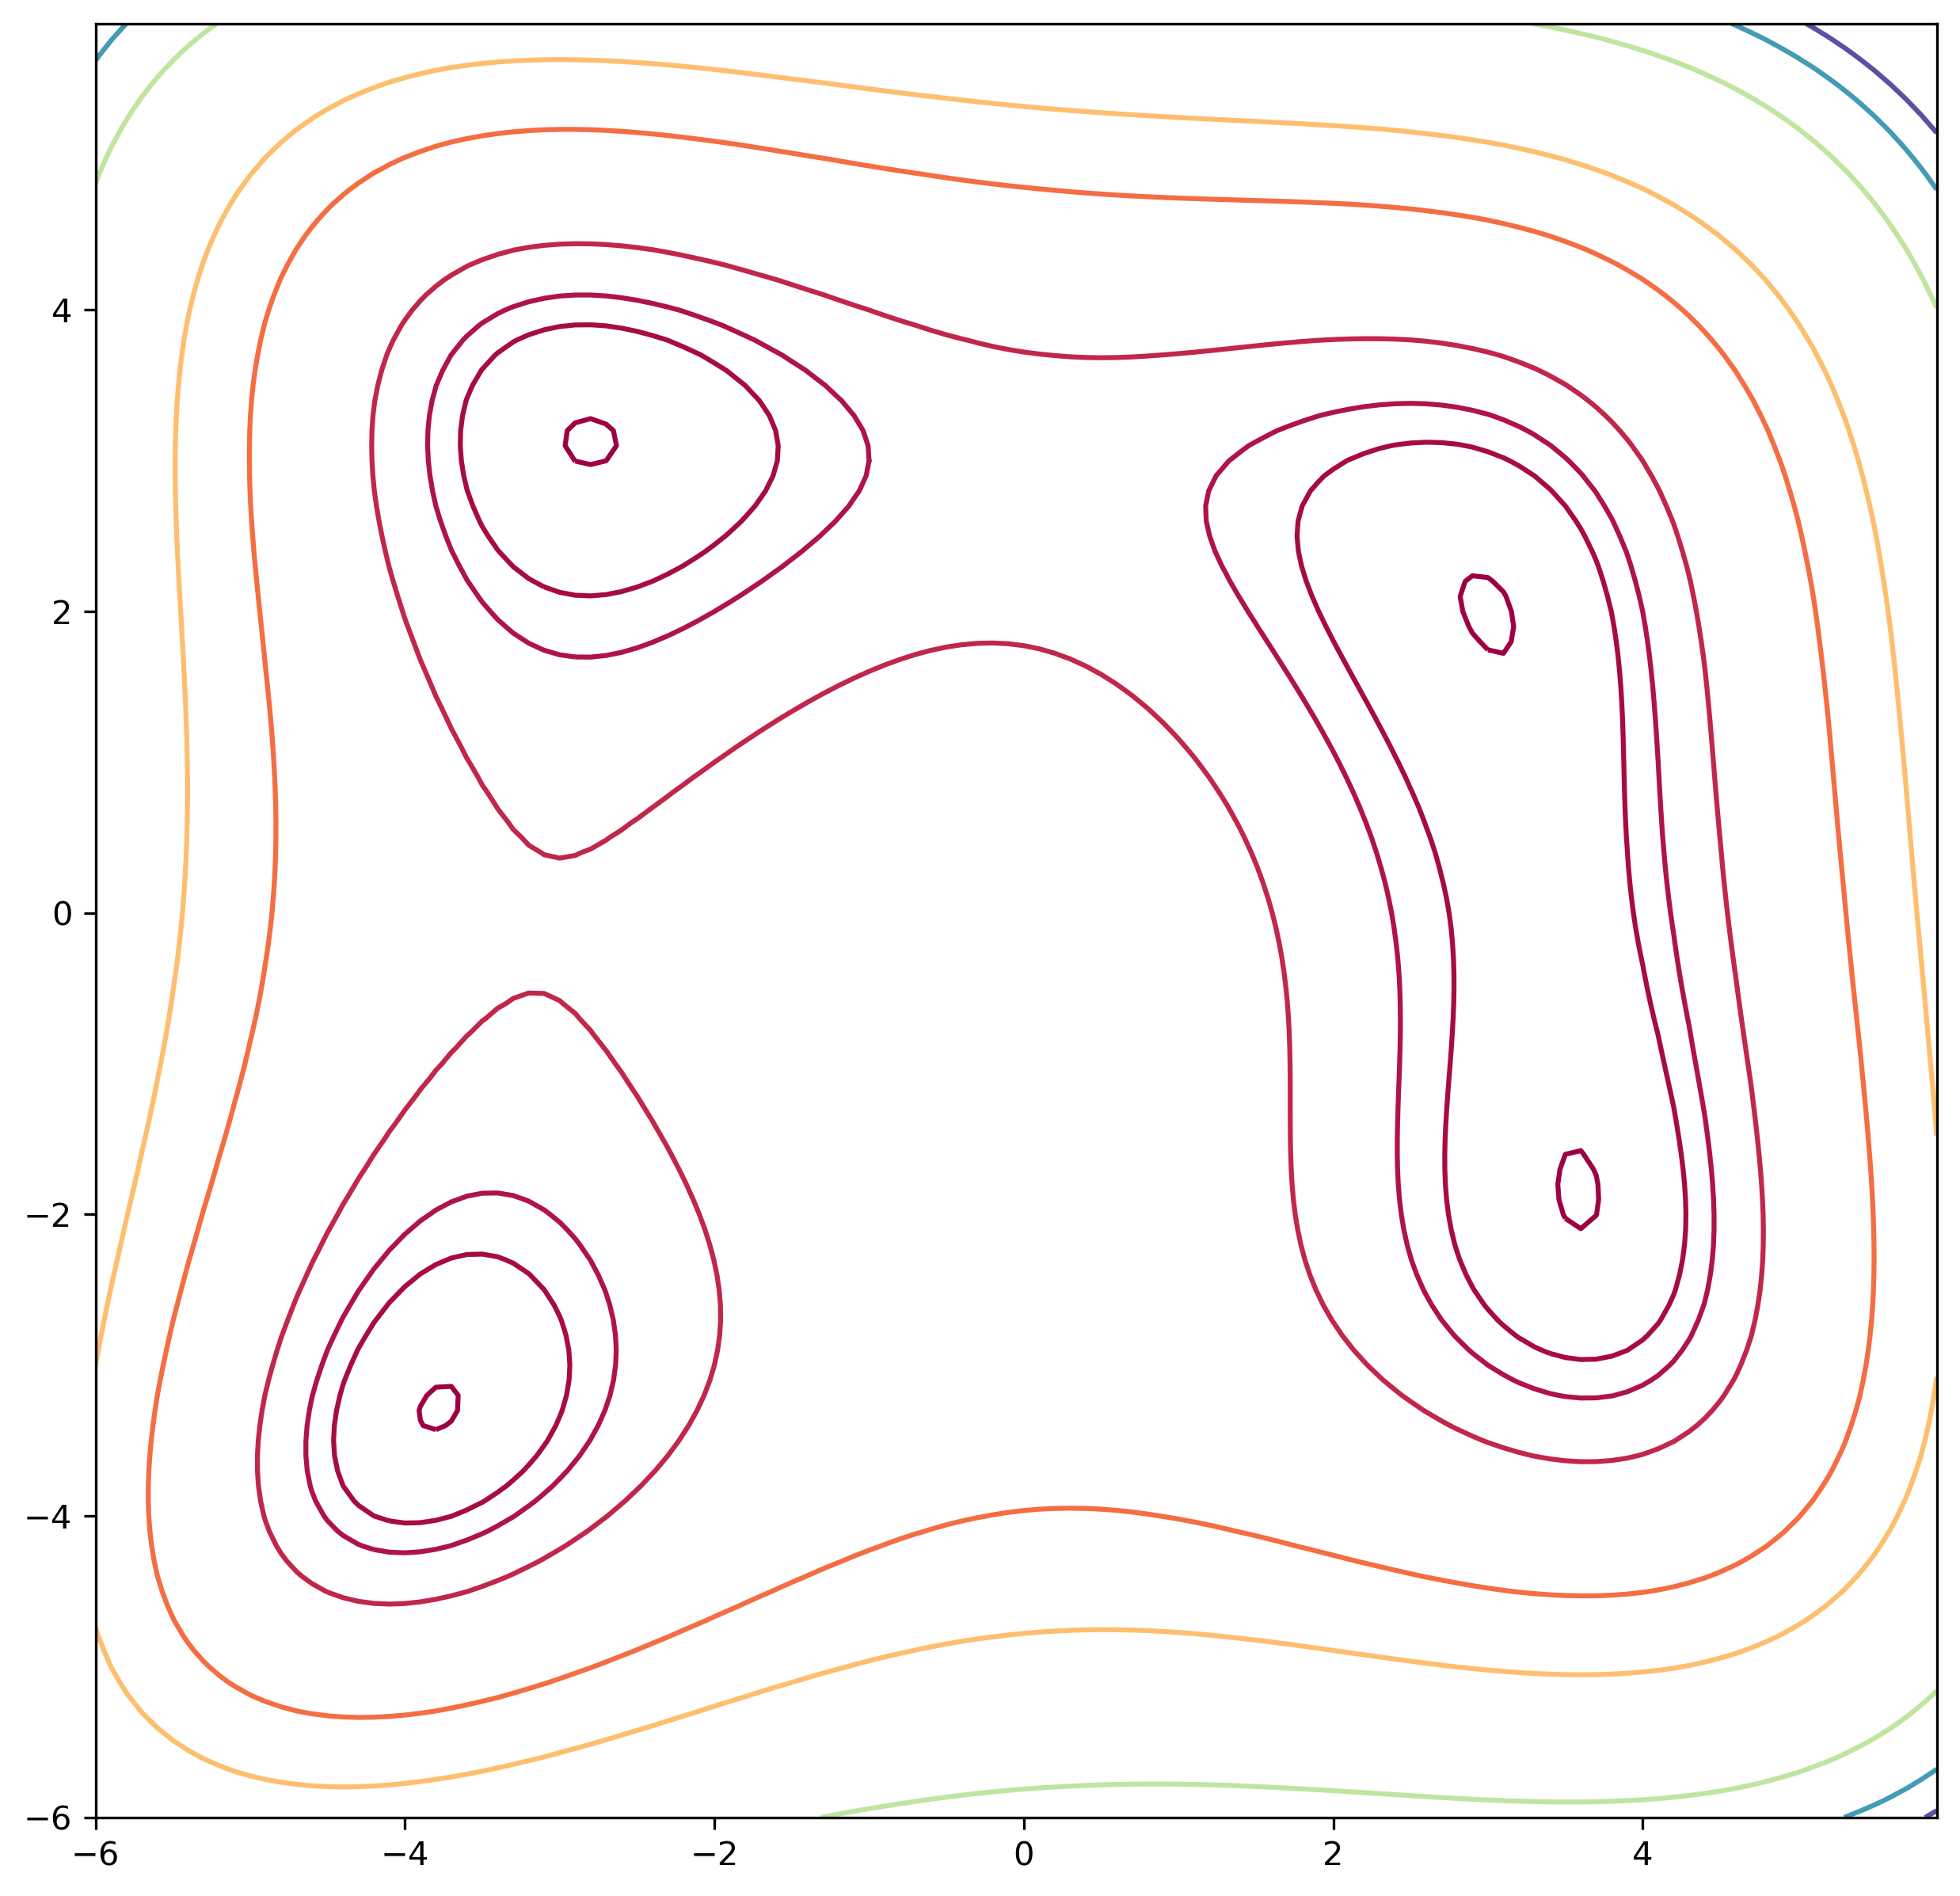

In [25]:
### Plot Himmelblau function in 2D

# Initialize figure
fig = plt.figure()

# Add level curve (or contour) plot to figure
levels = [1, 30, 50, 100, 300, 500, 1000, 1300, 1500]
plt.contour(x, y, resultsHimm, levels=levels, cmap =cm.Spectral)

# Set figure title
ax.set_title('Himmelblau function')

# Show plot in notebook
plt.show()

## Find global minima using Differential Evolution

Here we call the Differential Evolution algorithm multiple times to create candidate solutions. Each optimization produces a single value, and as we will see, the optimized values are found in all of the global minima.

In [26]:
# Set list to store optimization results
himmResults = []

for _ in range(100):
    
    # Parameters are set to increase search radius.
    # Maximum number of iterations (maxiter) is reduced to highlight result diversity. 
    # Increase "maxiter" in production runs to 100 or more!
    resultHimmDE = differential_evolution(himmelblau, boundsHimm, mutation=(0.7, 1.2), recombination=0.5,
                                          polish=False, maxiter=10, updating="deferred" )
    
    himmResults.append(list(resultHimmDE.x))

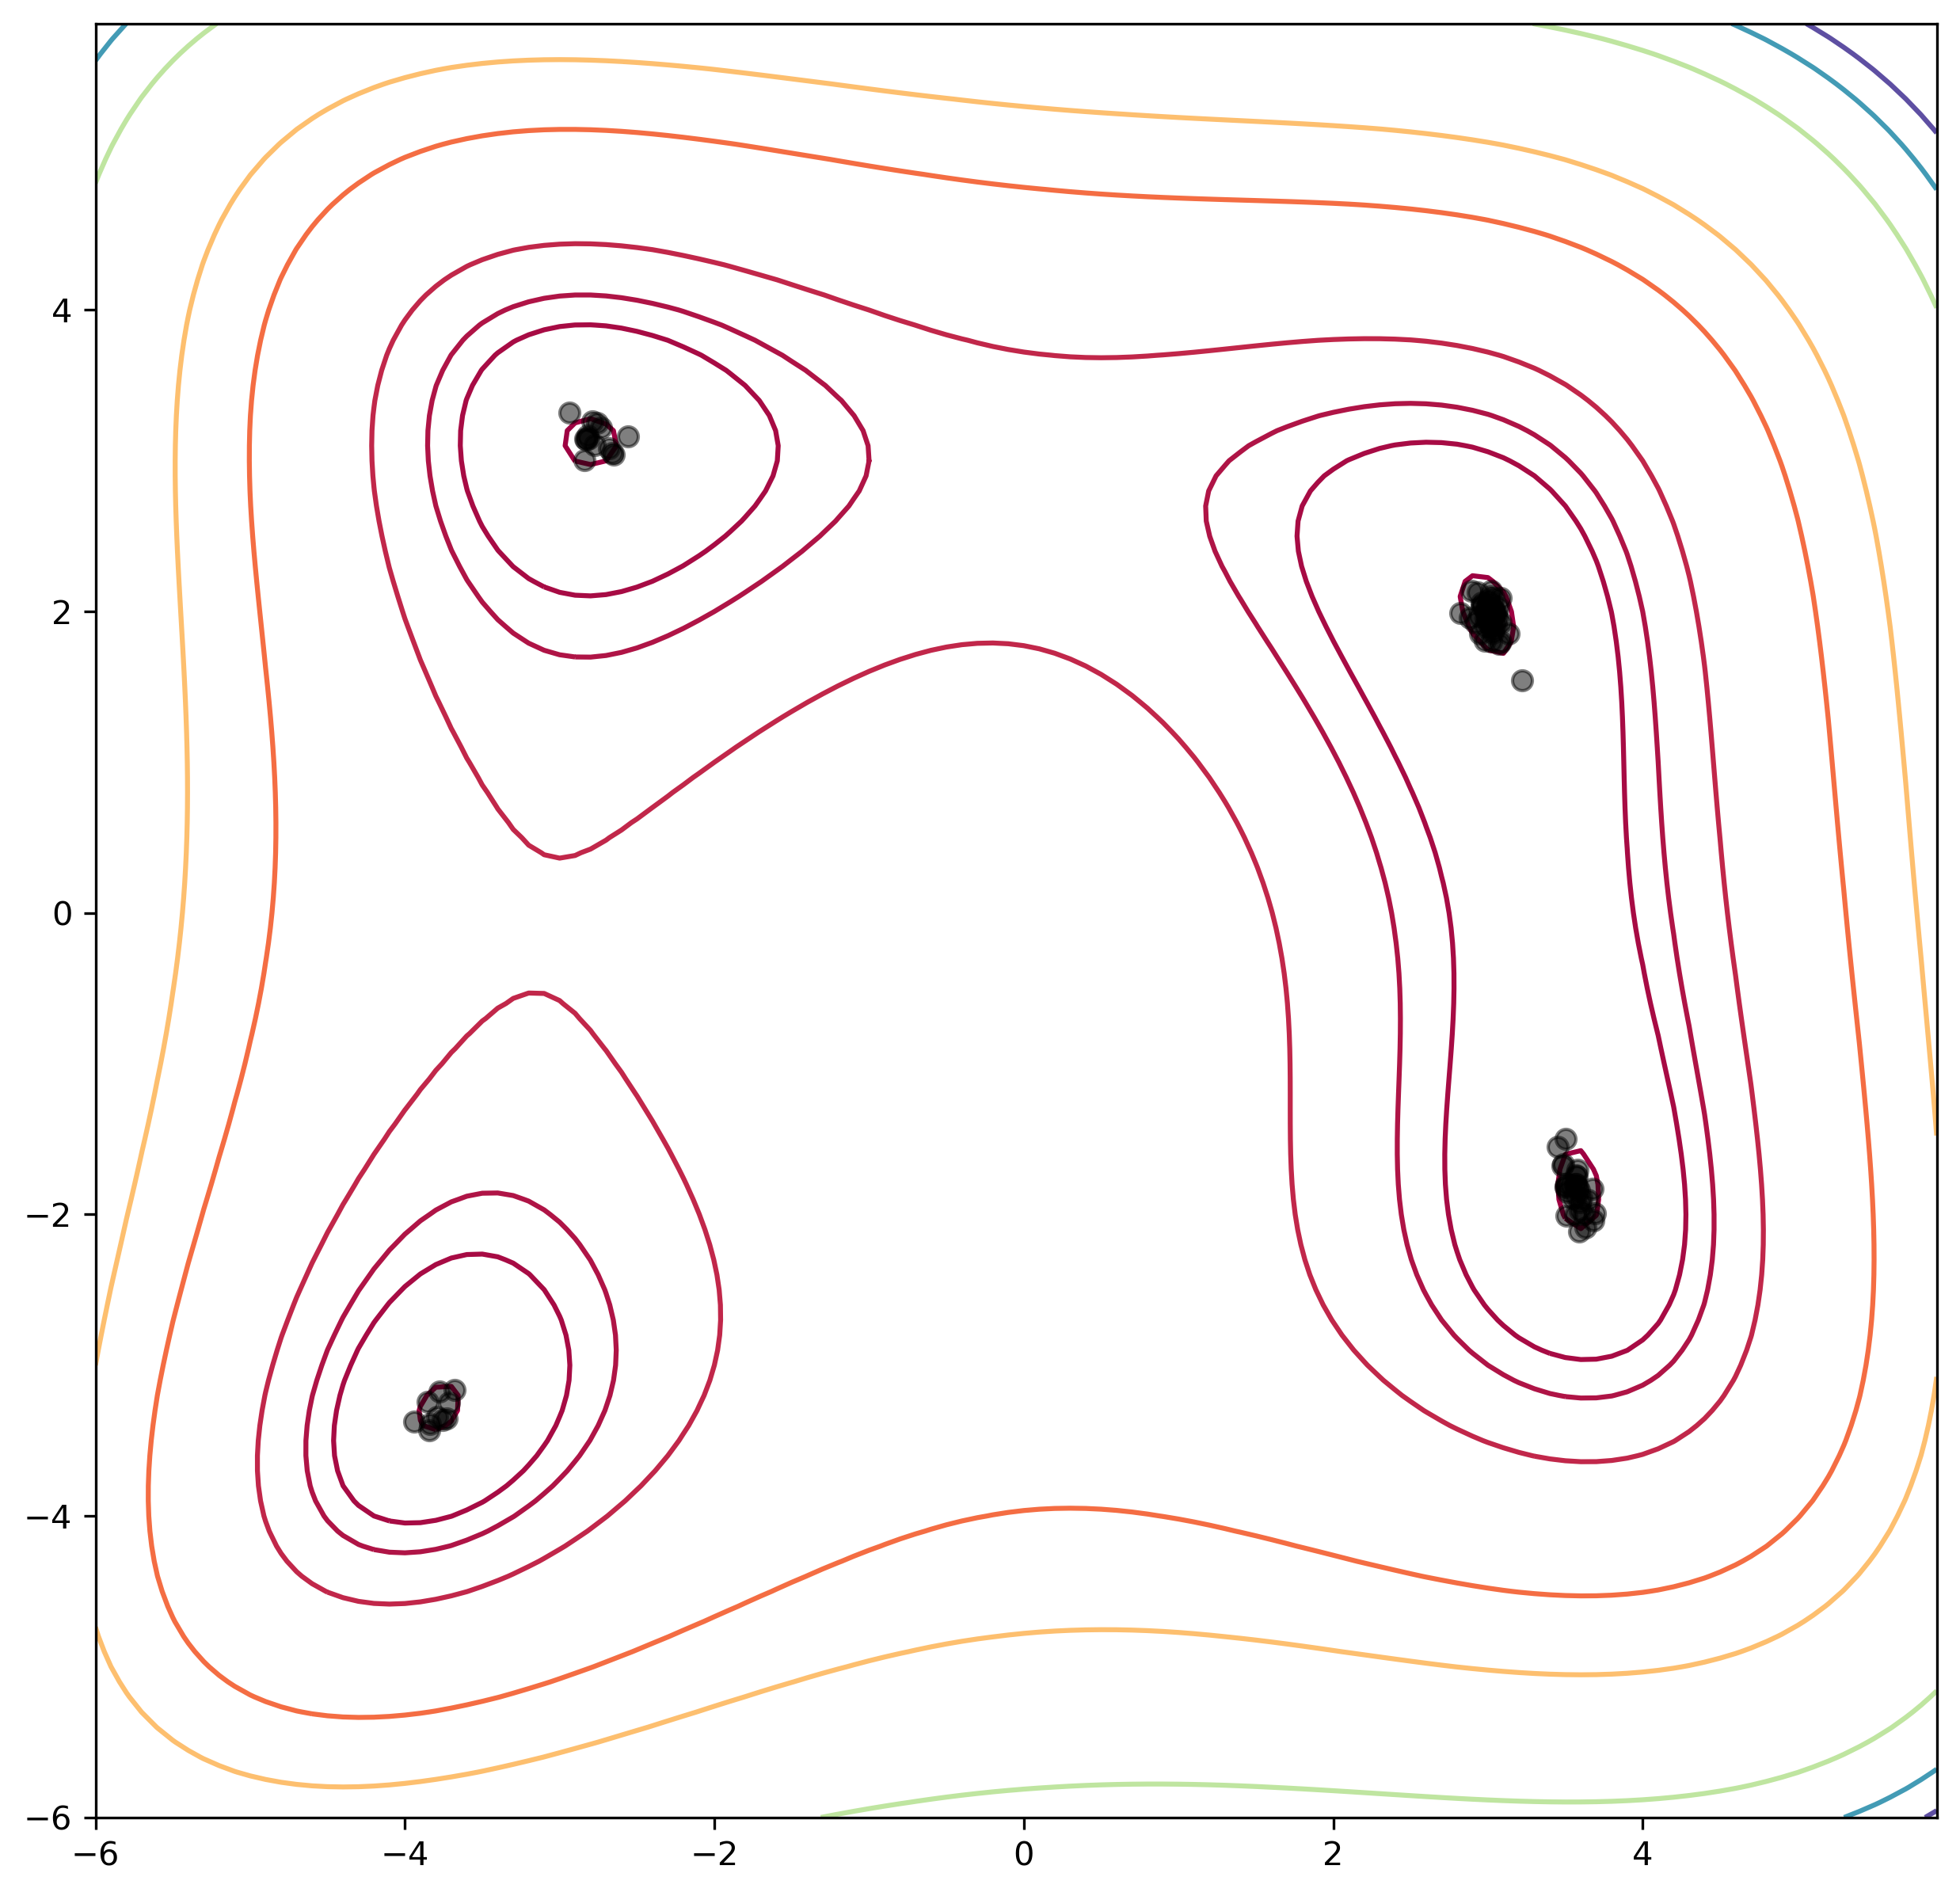

In [28]:
### Plot Himmelblau function in 2D

# Initialize figure
fig = plt.figure()

# Add level curve (or contour) plot to figure
levels = [1, 30, 50, 100, 300, 500, 1000, 1300, 1500]
plt.contour(x, y, resultsHimm, levels=levels, cmap =cm.Spectral)

for res in himmResults:
    plt.plot(res[0], res[1], 'ko', alpha=0.5)

# Set figure title
ax.set_title('Himmelblau function')

# Show plot in notebook
plt.show()